In [64]:
#Load libraries
import pandas as pd

#set seed
seed=2

# import lux

## Create dataframe
### Import datasets

In [4]:
#Individual level datasets

#cov dataset
df_cov_07 = pd.io.stata.read_stata('data/cov.dta')

df_cov_07 = df_cov_07[['pidlink', 'hhid07', 'marstat', 'age', 'sex']]

#dl1 dataset
df_dl1_07 = pd.io.stata.read_stata('data/dl1.dta')

df_dl1_07 = df_dl1_07[['pidlink', 'hhid07', 'dl05a', 'dl05b', 'dl06']]

#sw 2014 dataset
# df_sw_14 = pd.io.stata.read_stata('data/sw.dta')

# df_sw_14 = df_sw_14[['pidlink', 'hhid07', 'sw01']]

#sw 2007 dataset
df_sw_07 = pd.io.stata.read_stata('data/sw_07.dta')

df_sw_07 = df_sw_07[['pidlink', 'hhid07', 'sw05', 'sw01', 'sw07', 'sw03']]

#tk1 dataset
df_tk1_07 = pd.io.stata.read_stata('data/tk1.dta')

df_tk1_07 = df_tk1_07[['pidlink', 'hhid07', 'tk01a', 'tk01']]

#ar1 dataset
df_ar1_07 = pd.io.stata.read_stata('data/ar1.dta')

df_ar1_07 = df_ar1_07[['ar02b', 'hhid07', 'pidlink', 'ar15a', 'ar15b']]



#Household level datasets

#hr1_hh_07 dataset
df_b2_hr1_07 = pd.io.stata.read_stata('data/b2_hr1.dta')

df_b2_hr1_07 = df_b2_hr1_07[['hhid07', 'hr01', 'hrtype']]

#hr1_hh_14 dataset
df_b2_hr1_14 = pd.io.stata.read_stata('data/b2_hr1_14.dta')

df_b2_hr1_14 = df_b2_hr1_14[['hhid14', 'hr01', 'hrtype']]

#krk dataset
df_krk_07 = pd.io.stata.read_stata('data/krk.dta')

df_krk_07 = df_krk_07.drop(['version', 'module'], axis=1)

#ks0 dataset
df_ks0_07 = pd.io.stata.read_stata('data/ks0.dta')

df_ks0_07 = df_ks0_07[['ks02a', 'hhid07']]

#ar0 dataset
df_ar0_07 = pd.io.stata.read_stata('data/ar0.dta')

df_ar0_07 = df_ar0_07[['hhsize', 'hhid07']]

### Merge datasets

In [5]:
#Calculate income per capita (ipercap) for each household
df_ar1_07_2 = df_ar1_07.groupby(['hhid07']).sum().drop(['ar02b', 'ar15a'], axis=1).reset_index()

df_ar1_07_2 = df_ar1_07_2.merge(df_ar0_07, how="left", on="hhid07")

df_ar1_07_2['ipercap'] = df_ar1_07_2['ar15b'] / df_ar1_07_2['hhsize']
df_ar1_07_2.drop(['ar15b', 'hhsize'], axis=1, inplace=True)
df_ar1_07_2

,hhid07,ipercap
0,0012200,1.100000e+06
1,0012241,8.200000e+05
2,0012242,0.000000e+00
3,0012500,8.320000e+05
4,0012900,3.750000e+05
...,...,...
13531,3212800,3.636364e+05
13532,3212831,3.000000e+06
13533,3212900,1.500000e+06
13534,3212911,0.000000e+00


In [6]:
df_ar1_07_3 = df_ar1_07.drop(['ar15a', 'ar15b', 'hhid07'], axis=1)
df_ar1_07_3

,ar02b,pidlink
0,1.0,001220001
1,2.0,001220002
2,3.0,001220003
3,3.0,001220004
4,3.0,001220005
...,...,...
73011,3.0,321291105
73012,1.0,321300001
73013,2.0,321300002
73014,3.0,321300003


**df_b2_hr1_07** and **df_b2_hr1_14**: This is in long data format. We need to transform it into wide data in order to merge properly later on.

We also don't need multi-levels in our columns, so we'll flatten it using .to_flat_index()

In [7]:
#2007

#transform long data into wide data
df_b2_hr1_07 = df_b2_hr1_07.pivot(columns=['hrtype'],
                     values=['hr01'],
                     index=['hhid07'])

#flatten column names
df_b2_hr1_07.columns = ["_".join(a) for a in df_b2_hr1_07.columns.to_flat_index()]

#reset index
df_b2_hr1_07 = df_b2_hr1_07.reset_index()

In [8]:
df_b2_hr1_07

,hhid07,hr01_A,hr01_B,hr01_C,hr01_D1,hr01_D2,hr01_D3,hr01_E,hr01_F,hr01_G,hr01_H,hr01_J,hr01_K1,hr01_K2
0,0012200,1.0,3.0,1.0,1.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,1.0,3.0
1,0012241,1.0,3.0,3.0,1.0,3.0,3.0,3.0,1.0,3.0,3.0,1.0,1.0,3.0
2,0012242,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0
3,0012500,1.0,3.0,3.0,3.0,3.0,1.0,3.0,3.0,3.0,3.0,3.0,1.0,3.0
4,0012900,1.0,3.0,3.0,1.0,3.0,3.0,3.0,1.0,3.0,3.0,1.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12982,3212741,1.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0
12983,3212800,1.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,1.0,1.0
12984,3212900,1.0,3.0,3.0,3.0,1.0,3.0,1.0,1.0,1.0,1.0,1.0,1.0,3.0
12985,3212911,1.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,1.0,1.0,3.0


Keep only household id and financial inclusion data from 2014 - **hr01_G**. This is our target variable.

In [9]:
#2014

#transform long data into wide data
df_b2_hr1_14 = df_b2_hr1_14.pivot(columns=['hrtype'],
                     values=['hr01'],
                     index=['hhid14'])

#flatten column names
df_b2_hr1_14.columns = ["_".join(a) for a in df_b2_hr1_14.columns.to_flat_index()]

#reset index
df_b2_hr1_14 = df_b2_hr1_14.reset_index()

#get only hr01_G and hhid
df_b2_hr1_14 = df_b2_hr1_14[['hhid14', 'hr01_G']]

1. Create a list of dataframes to join by individual ID (pidlink) and household ID (hhid07).
2. Merge them all together. Call this dataframe 'df'.

In [ ]:
# df_list = [df_cov_07, df_dl1_07, df_tk1_07, df_sw_07]

In [ ]:
# from functools import reduce

# #merge datasets by individual id (pidlink)
# df = reduce(lambda  left,right: pd.merge(left,right,on=['pidlink', 'hhid07'],
#                                             how='left'), df_list)

In [ ]:
# df

1. Create a list of dataframes to join by household ID (hhid07)
2. Merge this with the previous dataframe, df.

In [10]:
#merge by household id (hhid07)

from functools import reduce

# df_list2 = [df, df_krk_07, df_b2_hr1_07, df_sc_07, df_ks0_07, df_ar1_07_2]

#identify datasets to merge
df_list2 = [df_krk_07, df_b2_hr1_07, df_ks0_07, df_ar1_07_2]

#merge
df = reduce(lambda  left,right: pd.merge(left,right,on=['hhid07'],
                                            how='left'), df_list2)

Merge on hhid14/hhid07
Rows with NaNs in hhid14 columns get included, remove them (or later stages will take care of NAs too). 3414 rows.

In [11]:
#merge df with target column - this is merged separately because of a different column name (hhid14)
df = pd.merge(df, df_b2_hr1_14,
                  how='left',
                  left_on="hhid07",
                  right_on="hhid14")

#Only keep those where ids in hhid07 and hhid14 are the same (NAs appearing for some reason)
matched_id = (df['hhid07'] == df['hhid14'])

df = df[matched_id]

df

,krk01,krk02a,krk02b,krk02c,krk02d,krk02e,krk02f,krk02g,krk02h,krk02i,...,hr01_F,hr01_G_x,hr01_H,hr01_J,hr01_K1,hr01_K2,ks02a,ipercap,hhid14,hr01_G_y
0,1.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,...,1.0,3.0,3.0,3.0,1.0,3.0,30.0,1.100000e+06,0012200,3:No
1,1.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,...,1.0,3.0,3.0,1.0,1.0,3.0,15.0,8.200000e+05,0012241,1:Yes
2,6.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,...,3.0,3.0,3.0,3.0,3.0,1.0,0.0,0.000000e+00,0012242,3:No
3,1.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,...,3.0,3.0,3.0,3.0,1.0,3.0,10.5,8.320000e+05,0012500,3:No
4,1.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,...,1.0,3.0,3.0,1.0,1.0,3.0,22.5,3.750000e+05,0012900,3:No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13529,1.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,3.0,3.0,...,1.0,1.0,1.0,1.0,1.0,3.0,0.0,1.666667e+06,3212741,1:Yes
13530,8.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,3.0,3.0,...,1.0,1.0,3.0,3.0,1.0,1.0,8.0,3.636364e+05,3212800,3:No
13532,8.0,3.0,3.0,1.0,1.0,1.0,3.0,1.0,3.0,3.0,...,1.0,1.0,1.0,1.0,1.0,3.0,0.0,1.500000e+06,3212900,1:Yes
13533,8.0,3.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,3.0,...,1.0,3.0,3.0,1.0,1.0,3.0,0.0,0.000000e+00,3212911,1:Yes


hr01_G_y is our target column.
The rest are features (except for hhids).

In [12]:
#Check if any columns are missing
df.columns

Index(['krk01', 'krk02a', 'krk02b', 'krk02c', 'krk02d', 'krk02e', 'krk02f',
       'krk02g', 'krk02h', 'krk02i', 'krk06', 'krk08', 'krk09', 'krk10',
       'hhid07', 'krk05a', 'hr01_A', 'hr01_B', 'hr01_C', 'hr01_D1', 'hr01_D2',
       'hr01_D3', 'hr01_E', 'hr01_F', 'hr01_G_x', 'hr01_H', 'hr01_J',
       'hr01_K1', 'hr01_K2', 'ks02a', 'ipercap', 'hhid14', 'hr01_G_y'],
      dtype='object')

## Preprocessing

Count total NAs in each column to see if any create problems for us by having too many NAs.

In [13]:
# Count total NaN at each column
print(" \nCount total NaN in each column : \n\n",
      df.isnull().sum())

df.shape

 
Count total NaN in each column : 

 krk01        0
krk02a       0
krk02b       0
krk02c       0
krk02d       0
krk02e       0
krk02f       0
krk02g       0
krk02h       0
krk02i       0
krk06        0
krk08        0
krk09        0
krk10        0
hhid07       0
krk05a       0
hr01_A      56
hr01_B      56
hr01_C      56
hr01_D1     56
hr01_D2     56
hr01_D3     56
hr01_E      56
hr01_F      56
hr01_G_x    56
hr01_H      56
hr01_J      56
hr01_K1     56
hr01_K2     56
ks02a       53
ipercap      0
hhid14       0
hr01_G_y     0
dtype: int64


(10986, 33)

In [14]:
#Types of values in target column (1, 3, 9)

df['hr01_G_y'].unique()

array(['3:No', '1:Yes', '9:Missing'], dtype=object)

In [15]:
#Clean target column/ Manual label encode
import numpy as np

df['hr01_G_y'].replace("3:No", 3, inplace=True)
df['hr01_G_y'].replace("1:Yes", 1, inplace=True)
df['hr01_G_y'].replace("9:Missing", np.NaN, inplace=True)

In [16]:
#Remove rows with NAs
df = df.dropna()

In [17]:
df.isna().sum()

krk01       0
krk02a      0
krk02b      0
krk02c      0
krk02d      0
krk02e      0
krk02f      0
krk02g      0
krk02h      0
krk02i      0
krk06       0
krk08       0
krk09       0
krk10       0
hhid07      0
krk05a      0
hr01_A      0
hr01_B      0
hr01_C      0
hr01_D1     0
hr01_D2     0
hr01_D3     0
hr01_E      0
hr01_F      0
hr01_G_x    0
hr01_H      0
hr01_J      0
hr01_K1     0
hr01_K2     0
ks02a       0
ipercap     0
hhid14      0
hr01_G_y    0
dtype: int64

In [ ]:
# #save column names to csv - we will rename them
# pd.DataFrame(df.columns).to_csv("ifls_colshh.csv")

In [18]:
#Rename columns

#Name columns (off Python)

#Import column names
col_names = pd.read_csv("ifls_colshh_ref.csv")

#Assign new column names
df.columns = col_names['col_name']
df

col_name,housetype,waste,trash,stagnantwater,nearstable,ventilation,cleanyard,mediumyard,kitchenoutside,sharebedkitch,...,own_hhappliance,own_fininstrument_7,own_receivables,own_jewelry,own_furniture,own_others,ricebought,ipercap,hhid14,own_fininstrument_14
0,1.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,3.0,3.0,...,1.0,3.0,3.0,3.0,1.0,3.0,30.0,1.100000e+06,0012200,3.0
1,1.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,...,1.0,3.0,3.0,1.0,1.0,3.0,15.0,8.200000e+05,0012241,1.0
2,6.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,...,3.0,3.0,3.0,3.0,3.0,1.0,0.0,0.000000e+00,0012242,3.0
3,1.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,...,3.0,3.0,3.0,3.0,1.0,3.0,10.5,8.320000e+05,0012500,3.0
4,1.0,3.0,3.0,3.0,1.0,1.0,1.0,1.0,1.0,3.0,...,1.0,3.0,3.0,1.0,1.0,3.0,22.5,3.750000e+05,0012900,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13529,1.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,3.0,3.0,...,1.0,1.0,1.0,1.0,1.0,3.0,0.0,1.666667e+06,3212741,1.0
13530,8.0,3.0,3.0,3.0,3.0,1.0,1.0,1.0,3.0,3.0,...,1.0,1.0,3.0,3.0,1.0,1.0,8.0,3.636364e+05,3212800,3.0
13532,8.0,3.0,3.0,1.0,1.0,1.0,3.0,1.0,3.0,3.0,...,1.0,1.0,1.0,1.0,1.0,3.0,0.0,1.500000e+06,3212900,1.0
13533,8.0,3.0,3.0,3.0,3.0,1.0,1.0,3.0,3.0,3.0,...,1.0,3.0,3.0,1.0,1.0,3.0,0.0,0.000000e+00,3212911,1.0


In [19]:
col_names['col_name']

0                housetype
1                    waste
2                    trash
3            stagnantwater
4               nearstable
5              ventilation
6                cleanyard
7               mediumyard
8           kitchenoutside
9            sharebedkitch
10                 numroom
11                   floor
12               outerwall
13                    roof
14                  hhid07
15                housesqm
16               own_house
17       own_otherbuilding
18                own_land
19           own_livestock
20             own_poultry
21        own_tanamankeras
22            own_vehicles
23         own_hhappliance
24     own_fininstrument_7
25         own_receivables
26             own_jewelry
27           own_furniture
28              own_others
29              ricebought
30                 ipercap
31                  hhid14
32    own_fininstrument_14
Name: col_name, dtype: object

In [ ]:
# #Label encode
# from sklearn.preprocessing import LabelEncoder

# label = LabelEncoder()

# #Convert sw05 into labels
# df.sw01_x = label.fit_transform(df['own_fininstrument_14'].astype(str))

# df.sw01_y = label.fit_transform(df['own_fininstrument_14'])
# print(df[['sw01_x','sw01_y']])

In [20]:
from collections import Counter

print(Counter(df['own_fininstrument_14']))
print(df.shape)

# Counter({3.0: 7706, 1.0: 3212})

Counter({3.0: 7706, 1.0: 3212})
(10918, 33)


In [21]:
#drop columns that have a single category for more than 95% of data
for col in df.columns.difference(['own_fininstrument_14']): 
    if df[col].value_counts(normalize=True).max(axis='rows') > 0.95:
        df = df.drop(columns=col,inplace=False)
        
#own_furniture was dropped

### Drop hhid07, hhid14 & group low counts other (<100 obs)

In [22]:
df = df.drop(['hhid07', 'hhid14'], axis=1, inplace=False)

In [23]:
# Categorical input features. Exclude the target variable
categorical = df.loc[:,df.nunique()<=18].columns.difference(['own_fininstrument_14'])

In [24]:
#Group together categories with low counts

# New arbitrary category level
new_level = 100

# Min number of examples per category level
min_count = 100

for col in df[categorical].columns:
        all_levels = df[col].value_counts().index
        sparse_levels = df[col].value_counts()[df[col].value_counts() < min_count].index
        combine_levels = {x: new_level if x in sparse_levels else x for x in all_levels} 
        df[col] = df[col].map(combine_levels)

### Feature selection

#### Cramer's V for categorical correlation

In [25]:
from pycorrcat.pycorrcat import plot_corr, corr_matrix
import seaborn as sns
import matplotlib.pyplot as plt

all_columns = df.columns #we want to include own_fininstrument_14 and sc010700 this time

correlation_matrix = corr_matrix(df, all_columns)


<AxesSubplot:>

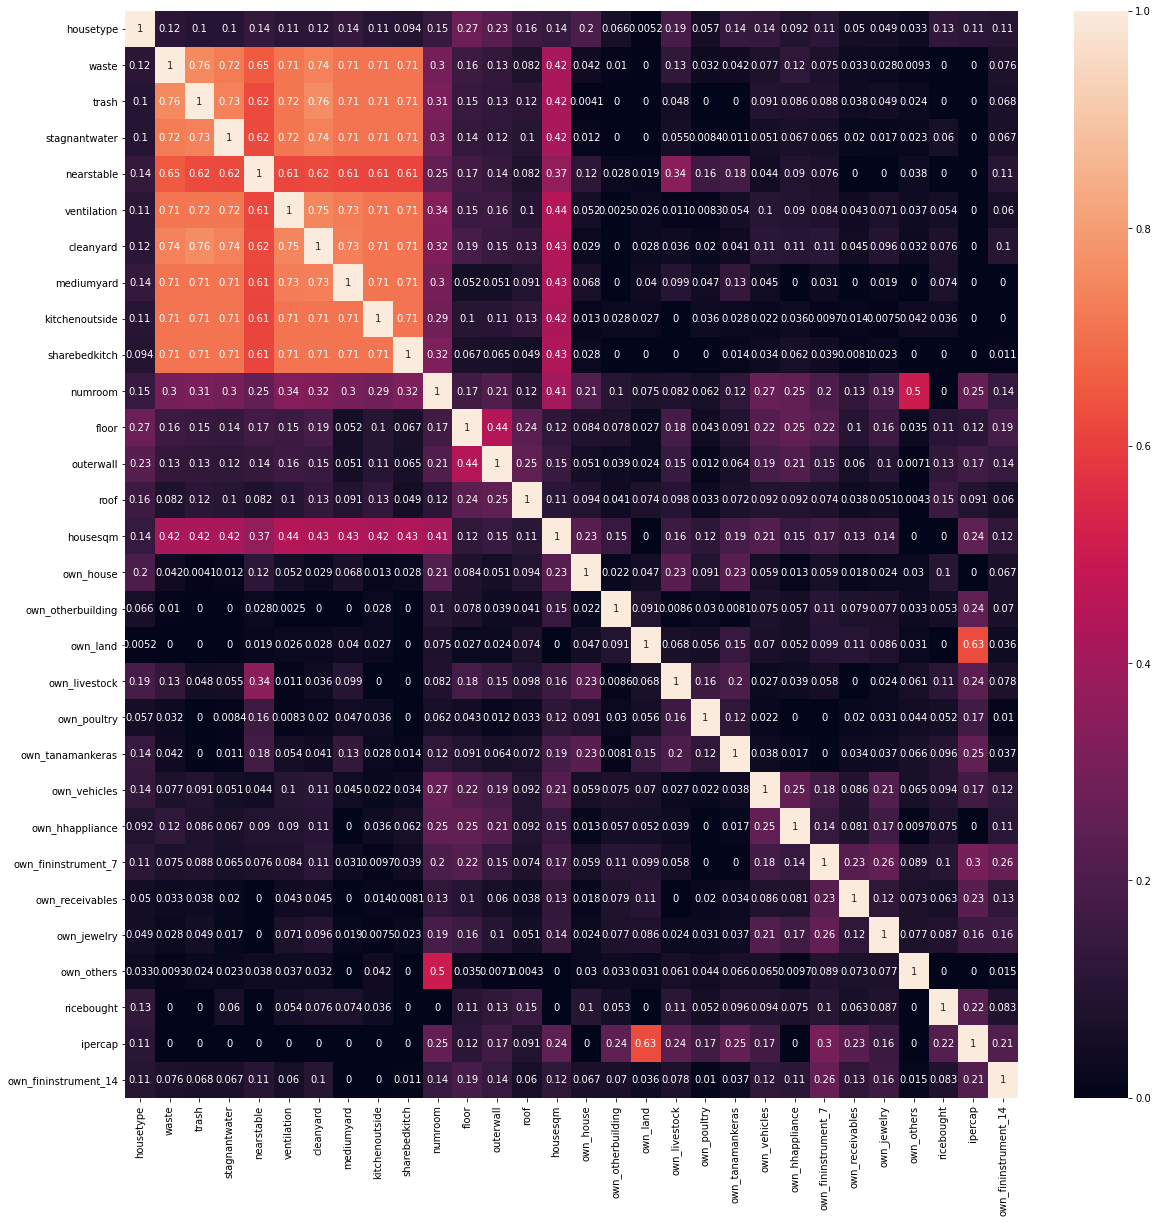

In [26]:
plt.figure(figsize=(20,20))
plot_corr(df, all_columns)

In [27]:
correlation_matrix

,housetype,waste,trash,stagnantwater,nearstable,ventilation,cleanyard,mediumyard,kitchenoutside,sharebedkitch,...,own_tanamankeras,own_vehicles,own_hhappliance,own_fininstrument_7,own_receivables,own_jewelry,own_others,ricebought,ipercap,own_fininstrument_14
housetype,1.000000,0.115536,0.100655,0.099820,0.137573,0.114001,0.115457,0.137805,0.107772,0.094134,...,0.141783,0.136774,0.092416,0.110106,0.049955,0.048873,0.032738,0.132194,0.109756,0.105128
waste,0.115536,1.000000,0.757767,0.723380,0.654014,0.714720,0.735967,0.707209,0.707132,0.707760,...,0.042111,0.076619,0.122995,0.074596,0.032620,0.028217,0.009328,0.000000,0.000000,0.075843
trash,0.100655,0.757767,1.000000,0.734465,0.622713,0.718722,0.764100,0.708689,0.707223,0.708788,...,0.000000,0.091216,0.085506,0.088238,0.037825,0.049175,0.024347,0.000000,0.000000,0.068405
stagnantwater,0.099820,0.723380,0.734465,1.000000,0.618251,0.715586,0.735983,0.710327,0.707537,0.708991,...,0.011024,0.051257,0.066634,0.065356,0.020305,0.017449,0.022593,0.060209,0.000000,0.067092
nearstable,0.137573,0.654014,0.622713,0.618251,1.000000,0.613588,0.620605,0.613986,0.612309,0.612268,...,0.179230,0.043719,0.090490,0.076006,0.000000,0.000000,0.038132,0.000000,0.000000,0.106023
ventilation,0.114001,0.714720,0.718722,0.715586,0.613588,1.000000,0.746636,0.726700,0.707167,0.710857,...,0.054096,0.104636,0.089997,0.084034,0.042914,0.071106,0.036571,0.053689,0.000000,0.059754
cleanyard,0.115457,0.735967,0.764100,0.735983,0.620605,0.746636,1.000000,0.732812,0.708747,0.708840,...,0.041024,0.111021,0.105737,0.113247,0.045047,0.095531,0.032317,0.075508,0.000000,0.101718
mediumyard,0.137805,0.707209,0.708689,0.710327,0.613986,0.726700,0.732812,1.000000,0.709200,0.707936,...,0.134140,0.044921,0.000000,0.031310,0.000000,0.018631,0.000000,0.073917,0.000000,0.000000
kitchenoutside,0.107772,0.707132,0.707223,0.707537,0.612309,0.707167,0.708747,0.709200,1.000000,0.709185,...,0.028162,0.022221,0.035776,0.009652,0.013796,0.007491,0.041902,0.036378,0.000000,0.000000
sharebedkitch,0.094134,0.707760,0.708788,0.708991,0.612268,0.710857,0.708840,0.707936,0.709185,1.000000,...,0.013583,0.034434,0.061753,0.039124,0.008075,0.022786,0.000000,0.000000,0.000000,0.011300


Own_jewelry is correlated with y, but also highly correlated with other variables such as own_vehicle, own_hhappliance, own_receivables. We will remove these all these to avoid multicollinearity.

In [28]:
#View those with correlation above 0.1
top_corr = correlation_matrix.loc[correlation_matrix['own_fininstrument_14']>0.08,['own_fininstrument_14']].sort_values(by='own_fininstrument_14')
top_corr.index

Index(['ricebought', 'cleanyard', 'housetype', 'nearstable', 'own_hhappliance',
       'housesqm', 'own_vehicles', 'own_receivables', 'outerwall', 'numroom',
       'own_jewelry', 'floor', 'ipercap', 'own_fininstrument_7',
       'own_fininstrument_14'],
      dtype='object')

<AxesSubplot:>

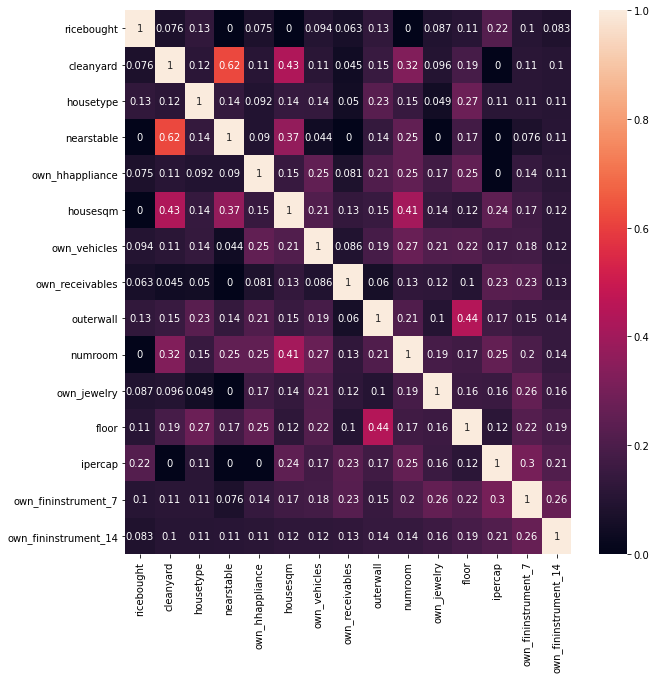

In [29]:
#View correlation for selected features
plt.figure(figsize=(10,10))
plot_corr(df, list(top_corr.index))

In [30]:
#Subset df by most correlated columns
df_subset = df[top_corr.index]

In [31]:
df_subset.to_csv("ifls_hh_reduced.csv")

#### Extra Trees Classifier
Identify top features using Extra Trees Classifier

In [36]:
from sklearn.ensemble import ExtraTreesClassifier

x0 = df.drop(['own_fininstrument_14'], axis=1)
y0 = df['own_fininstrument_14']

ETC = ExtraTreesClassifier(n_estimators=20)
ETC.fit(x0, y0)
print(ETC.feature_importances_)

[0.04477972 0.00871148 0.01332328 0.01674851 0.01994001 0.01849841
 0.01955415 0.02940655 0.03135957 0.01401395 0.09170921 0.05989677
 0.02861312 0.04728593 0.11050839 0.02044185 0.01299147 0.01991352
 0.01607259 0.01527828 0.01587794 0.01751305 0.01042336 0.05856574
 0.01490497 0.01997111 0.0167142  0.08840549 0.11857738]


In [33]:
ETC.feature_importances_

feature_importance_normalized = np.std([ETC.feature_importances_ for tree in 
                                        ETC.estimators_],
                                        axis = 0)

We find that 5 exceed score of 0.08.
1. ipercap
2. ricebought
3. numroom
4. housesqm
5. sc010700

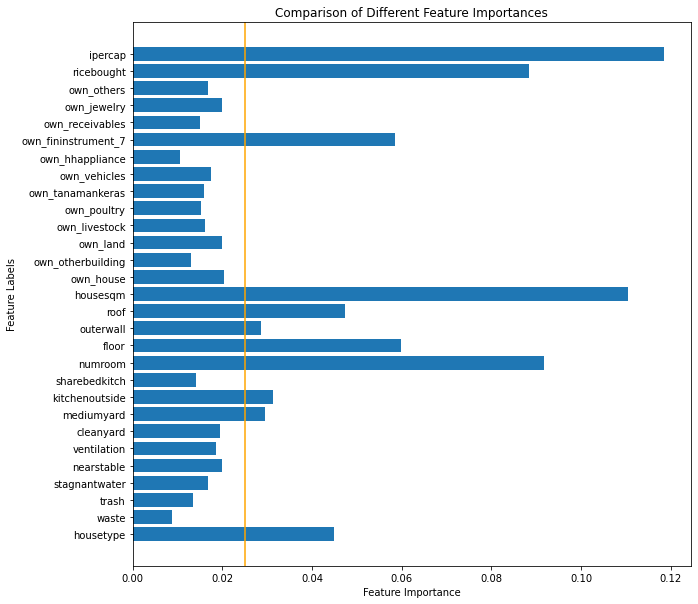

In [38]:
# Plotting a Bar Graph to compare the models
plt.figure(figsize=(10,10))
plt.barh(x0.columns, ETC.feature_importances_)
plt.ylabel('Feature Labels')
plt.xlabel('Feature Importance')
plt.title('Comparison of Different Feature Importances')
plt.axvline(x=0.025, color="orange")
plt.show()

3. Use recursive feature elimination

In [45]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier

mod = AdaBoostClassifier()
rfe = RFE(mod, 14)
fit = rfe.fit(x0, y0)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=14 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


Num Features: 14
Selected Features: [False False False False  True False False False False False  True  True
  True False  True False False False False False  True  True  True  True
  True  True  True  True  True]
Feature Ranking: [ 4 16 15  3  1 13  2 11 10  9  1  1  1  5  1 14  7 12  6  8  1  1  1  1
  1  1  1  1  1]


Using RFE, for 10 variables, we get the following:

1. nearstable
2. numroom
3. floor
4. outerwall
5. housesqm
6. own_receivables
7. own_jewelry
8. sc010700
9. ricebought
10. ipercap

Since this captures both variables from the correlation heat map, and extra trees classifier, we will use this set of variables.

In [46]:
#Check which are selected
pd.DataFrame(list(zip(fit.support_, x0.columns)))

,0,1
0,False,housetype
1,False,waste
2,False,trash
3,False,stagnantwater
4,True,nearstable
5,False,ventilation
6,False,cleanyard
7,False,mediumyard
8,False,kitchenoutside
9,False,sharebedkitch


## Split into X and y

In [47]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [48]:
#Extract features only
X = df_subset.drop(['own_fininstrument_14'], axis=1)
print(X)

#Extract target column
y = df_subset['own_fininstrument_14']
y = le.fit_transform(y)

#Change y column into dummies
y_dummies = pd.get_dummies(y)

y_dummies = y_dummies.reset_index(drop=True)

print(y_dummies)

col_name  ricebought  cleanyard  housetype  nearstable  own_hhappliance  \
0               30.0        1.0        1.0         1.0              1.0   
1               15.0        1.0        1.0         1.0              1.0   
2                0.0        3.0        6.0         3.0              3.0   
3               10.5        1.0        1.0         1.0              3.0   
4               22.5        1.0        1.0         1.0              1.0   
...              ...        ...        ...         ...              ...   
13529            0.0        1.0        1.0         3.0              1.0   
13530            8.0        1.0        8.0         3.0              1.0   
13532            0.0        3.0        8.0         1.0              1.0   
13533            0.0        1.0        8.0         3.0              1.0   
13534            0.0        3.0        2.0         3.0              1.0   

col_name  housesqm  own_vehicles  own_receivables  outerwall  numroom  \
0             42.0        

In [49]:
#Identify columns with more than 18 unique values (treat as numerical)
num = X.loc[:,X.nunique()>18].columns

#Identify columns with 18 unique values or less (categorical)
cat = X.loc[:,X.nunique()<=18].columns

In [50]:
#one hot encode X before we split and scale
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [51]:
encoder = OneHotEncoder(sparse=False, drop="if_binary")

X2 = encoder.fit_transform(X[cat])
X2 = pd.DataFrame(X2)
X2

,0,1,2,3,4,5,6,7,8,9,...,19,20,21,22,23,24,25,26,27,28
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10913,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
10914,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10915,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10916,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


In [52]:
# X[num].reset_index(drop=True)
# X3
X3 = X[num].reset_index(drop=True)

In [53]:
#merge together with X[num]

X4 = pd.concat([X2, X3], axis=1, join='outer')
X4

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,ricebought,housesqm,numroom,ipercap
0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,30.0,42.0,4.0,1.100000e+06
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,15.0,20.0,2.0,8.200000e+05
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,12.0,1.0,0.000000e+00
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,10.5,25.0,3.0,8.320000e+05
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,22.5,45.0,4.0,3.750000e+05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10913,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,63.0,1.0,1.666667e+06
10914,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,8.0,124.0,8.0,3.636364e+05
10915,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,54.0,4.0,1.500000e+06
10916,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,72.0,6.0,0.000000e+00


In [54]:
y_dummies

,0,1
0,0,1
1,1,0
2,0,1
3,0,1
4,0,1
...,...,...
10913,1,0
10914,0,1
10915,1,0
10916,1,0


In [55]:
#train test split before scaling

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X4, y_dummies, 
                                                    random_state=2,
                                                    stratify=y_dummies,
                                                    train_size=0.8)

X_train2, X_test2, y_train2, y_test2 = train_test_split(X4, y, 
                                                        stratify=y,
                                                        random_state=2,
                                                        train_size=0.8)

In [ ]:
X_train.shape

In [56]:
Counter(y_train2)

Counter({1: 6165, 0: 2569})

In [57]:
from sklearn.compose import ColumnTransformer

#Build pipeline to process data
t = [(('scaler'), StandardScaler(), num)]

In [58]:
#Create instance of ColumnTransformer
ct = ColumnTransformer(transformers=t, remainder='passthrough')

In [59]:
#Transform training data

#fit and transform
X_train = ct.fit_transform(X_train)
X_train2 = ct.fit_transform(X_train2)

#Convert back into dataframe for easy viewing
X_train = pd.DataFrame(X_train)
X_train2 = pd.DataFrame(X_train2)


In [60]:
#Transform test data

#fit and transform
X_test = ct.transform(X_test)
X_test2 = ct.transform(X_test2)

#Convert back into dataframe for easy viewing
X_test = pd.DataFrame(X_test)
X_test2 = pd.DataFrame(X_test2)


In [61]:
X_test

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-0.050324,-0.122243,-0.917244,1.501527,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.031633,-0.175295,0.236665,0.054043,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.040979,-0.160137,-0.532607,1.604498,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.066495,-0.038876,-0.532607,-0.563785,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.050324,-0.008560,1.005938,-0.453798,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2179,-0.026960,-0.198031,-0.917244,-0.046928,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2180,-0.050324,0.143016,1.390575,0.714741,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2181,-0.050324,-0.023718,-0.147971,0.707176,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2182,-0.003596,-0.031297,-0.917244,-0.548094,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


## Oversample training set

In [65]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=seed, sampling_strategy="auto")
X_train_os, y_train_os = sm.fit_resample(X_train2.values, y_train2)

X_train_os.shape, y_train_os.shape

((12330, 33), (12330,))

In [ ]:
# pd.DataFrame(y_train_os)

## Undersample training set

In [66]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=seed)

X_train_us, y_train_us = rus.fit_resample(X_train2.values, y_train2)

In [67]:
# yay, balanced now
Counter(y_train_us) 

Counter({0: 2569, 1: 2569})

## Keras

In [68]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD
from keras.constraints import maxnorm

In [69]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-0.003015,-0.178694,-0.924196,-0.311652,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-0.049745,0.012163,0.222222,-0.016758,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,-0.017034,-0.248096,-0.159917,-0.198057,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,-0.049745,-0.222070,-0.542057,-0.348514,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.049745,-0.074590,0.986500,0.715212,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8729,-0.049745,-0.039889,0.604361,-0.272157,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
8730,-0.017034,-0.300148,-0.542057,-0.335349,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8731,-0.021707,0.064214,0.222222,-0.426516,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
8732,-0.017034,-0.243758,-0.924196,-0.403806,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [70]:
#create validation data
xtrain, xval, ytrain, yval = train_test_split(X_train, y_train, test_size = 0.1, random_state=seed)

In [71]:
yval

,0,1
10190,0,1
1239,0,1
9758,1,0
1181,0,1
6089,0,1
...,...,...
10226,1,0
9966,1,0
7517,0,1
1861,0,1


In [77]:
#Create model
def keras_model(X_train, X_test, y_train, y_test,
                activation='relu', 
                layer1_nodes=141, 
                layer2_nodes=94, 
                layer3_nodes=47,
               validation_data=None ):
    
    #Instantiate model
    model = Sequential()
    
    #Layers
    model.add(Dropout(0.1, input_dim=33))
    model.add(Dense(layer1_nodes, input_dim=33, activation=activation,
                   kernel_constraint=maxnorm(3)))
    model.add(Dense(layer2_nodes, activation=activation,
                   kernel_constraint=maxnorm(3)))
    model.add(Dense(layer3_nodes, activation=activation,
                   kernel_constraint=maxnorm(3)))
    model.add(Dense(2, activation='sigmoid'))
    
    #Compile
    sgd = SGD(learning_rate=0.1, momentum=0.9)
    model.compile(loss='binary_crossentropy', 
                  optimizer=sgd, 
                  metrics=['accuracy'])
    
    history = model.fit(X_train, y_train, 
                        epochs=200, 
                        batch_size=50,
                       validation_data=validation_data)
    
    #Predict
    y_pred = model.predict(X_test)
    y_pred = y_pred.round()
    
    #Evaluate
    from sklearn.metrics import classification_report

    print(classification_report(y_test, 
                                y_pred, 
                                zero_division=True))
    
    from sklearn.metrics import confusion_matrix

    print(confusion_matrix(
        y_test, y_pred))
    
    #Plot training history
    #History for accuracy
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()
    
    #History for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()


In [156]:
y_trainfloat = y_train2.astype('float')

In [224]:
#Instantiate model
model = Sequential()

#Layers
model.add(Dropout(0.1, input_dim=33))
model.add(Dense(99, input_dim=33, activation="relu",
               kernel_constraint=maxnorm(3)))
# model.add(Dense(66, activation="relu",
#                kernel_constraint=maxnorm(3)))
model.add(Dense(20, activation="relu",
               kernel_constraint=maxnorm(3)))
model.add(Dense(1, activation='sigmoid'))

#Compile
sgd = SGD(learning_rate=0.1, momentum=0.9)
model.compile(loss='binary_crossentropy', 
              optimizer=sgd, 
              metrics=['accuracy'])

history = model.fit(X_train_os, y_train_os, 
                    epochs=100, 
                    batch_size=50)



Epoch 1/100
247/247 [==============================] - 2s 2ms/step - loss: 0.6559 - accuracy: 0.6104
Epoch 2/100
247/247 [==============================] - 0s 2ms/step - loss: 0.6327 - accuracy: 0.6430
Epoch 3/100
247/247 [==============================] - 0s 2ms/step - loss: 0.6298 - accuracy: 0.6397
Epoch 4/100
247/247 [==============================] - 0s 2ms/step - loss: 0.6298 - accuracy: 0.6451
Epoch 5/100
247/247 [==============================] - 0s 2ms/step - loss: 0.6342 - accuracy: 0.6393
Epoch 6/100
247/247 [==============================] - 0s 2ms/step - loss: 0.6233 - accuracy: 0.6559
Epoch 7/100
247/247 [==============================] - 0s 2ms/step - loss: 0.6287 - accuracy: 0.6514
Epoch 8/100
247/247 [==============================] - 0s 2ms/step - loss: 0.6180 - accuracy: 0.6627
Epoch 9/100
247/247 [==============================] - 0s 2ms/step - loss: 0.6235 - accuracy: 0.6434
Epoch 10/100
247/247 [==============================] - 0s 2ms/step - loss: 0.6185 - accura

In [225]:
#Predict
y_pred = model.predict(X_test2)
y_pred = y_pred.round().astype('int32')

In [230]:
X4.shape

(10918, 33)

In [226]:
from keras.metrics import binary_accuracy, accuracy
from tensorflow.math import confusion_matrix

# print(confusion_matrix(y_test2, y_pred))

matrix = classification_report(y_test2, y_pred, zero_division=True)
print(matrix)

              precision    recall  f1-score   support

           0       0.39      0.51      0.44       643
           1       0.77      0.67      0.71      1541

    accuracy                           0.62      2184
   macro avg       0.58      0.59      0.58      2184
weighted avg       0.66      0.62      0.63      2184



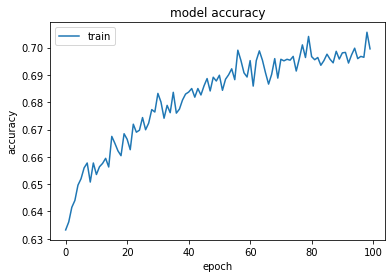

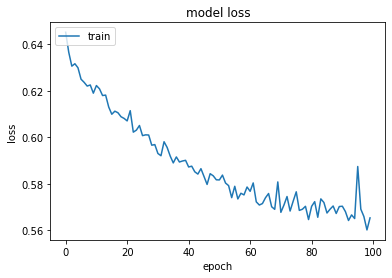

In [227]:
#Plot training history
#History for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

#History for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

In [228]:
from sklearn.metrics import roc_curve

fpr_keras, tpr_keras, thresholds_keras = roc_curve(y_test2, y_pred)

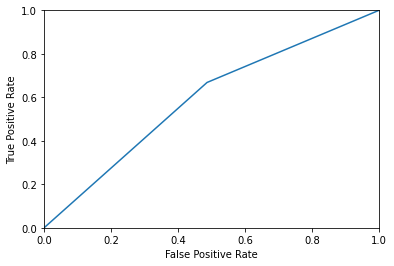

In [229]:
from sklearn.metrics import auc
auc_keras = auc(fpr_keras, tpr_keras)

def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show()    
  
plot_roc_curve(fpr_keras,tpr_keras) 

## LightGBM

In [ ]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(n_estimators=4, random_state=4)

results = model.fit(X_train2, y_train2)

y_pred7 = results.predict(X_test2)

print(classification_report(y_test2, y_pred7, zero_division=True))

## Logistic Regression

In [ ]:
y_train2

model = LogisticRegression()

model.fit(X_train2, y_train2)

y_pred = model.predict(X_test2)

print(classification_report(y_test2, y_pred))

## Compare multiple models

In [231]:
#create function to compare models
from sklearn import model_selection
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_fscore_support as score



def compare_models(X_train, X_test, y_train, y_test):
    
    #Define models
    seed = 143
    
    ABM = AdaBoostClassifier(n_estimators=400, random_state=seed)
    GBM = GradientBoostingClassifier(n_estimators=400, random_state=seed)
    DTM = DecisionTreeClassifier(max_depth=4, random_state=seed)
    RFM = RandomForestClassifier(max_depth=4, n_estimators=20, random_state=seed)
    XGM = XGBClassifier(max_depth=6, n_estimators=20, verbosity=0, use_label_encoder=False,
                        random_state=seed)
    SVM = SVC(random_state=seed)

    #define model names
    models = [ABM, GBM, DTM, RFM, XGM, SVM]
    model_name = ['AdaBoost', 'GradientBoosting', 'DecisionTree', 'RandomForest', 'XGBoost', 'SupportVector']

    #initiate empty lists
    precision_list=[]
    f1_list=[]
    recall_list=[]
    support_list=[]

    #loop through models
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        precision,recall,f1score,support = score(y_test, y_pred)

        precision_list.append(precision[1])
        recall_list.append(recall[1])
        f1_list.append(f1score[1])
        support_list.append(support[1])
        
    comparison_table = pd.DataFrame(list(zip(model_name, precision_list,
                                   recall_list, f1_list, support_list)),
                         columns = ['Model', 'Precision', 'Recall', 'F1 score', 'Support'])

    print("Comparison table")
    return comparison_table

In [233]:
#compare models for imbalanced data
imbres = compare_models(X_train2, X_test2, y_train2, y_test2)



Comparison table


In [234]:
#compare models for undersampled data
usres = compare_models(X_train_us, X_test2, y_train_us, y_test2)

Comparison table


In [235]:
#compare models for oversampled data
osres = compare_models(X_train_os, X_test2, y_train_os, y_test2)

Comparison table


In [236]:
imbres.to_csv("imbres.csv")
usres.to_csv("usres.csv")
osres.to_csv("osres.csv")

In [ ]:
#Use PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=12, random_state=4)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


## Robustness testing

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

bestfeatures = SelectKBest(score_func=f_classif, k=15)


In [ ]:
X_reduced = bestfeatures.fit_transform(X_train2, y_train2)

X_train_red, X_test_red, y_train_red, y_test_red = train_test_split(X_reduced, y_train2, stratify=y_train2, 
                                                    random_state=2, shuffle=True,
                                                   train_size=0.8)


In [ ]:
X_reduced.shape

In [ ]:
#compare models for data with reduced columns
compare_models(X_train_red, X_test_red, y_train_red, y_test_red)